In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

## The MNIST Digits Database

The dataset we use in this project is the dataset of handwritten digits. It is taken as a pickle file. The dataset consists of 70 thousands observations. Each entry is a 28 by 28 pixel image represented by a 784-dimensional vector.

The dataset is split into 50000 training elements, 10000 validation, and 10000 test observations.

The labels for the observations are between 0 and 9, i.e., there are 10 classes.

Each feature component (pixel) is a float value between 0.0 and 1.0 that is the intensity of the pixel, 0.0 is black, 1.0 is white.

In [2]:
current_path = os.getcwd()
file = '\\datasets\\mnist_data\\mnist.pkl.gz'

with gzip.open(current_path + file, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')


X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]


In [3]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [4]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))
print(f'Train index: {train_index}')
print(f'Validation index: {validation_index}' )
print(f'Test index: {test_index}', )

Train index: range(0, 50000)
Validation index: range(50000, 60000)
Test index: range(60000, 70000)


In this step, we create `pandas` DataFrames out of `numpy` arrays with index values that we set up before.
The labels are converted into `pandas` Series:

In [5]:
type_x_train_orig = type(X_train)
type_y_train_orig = type(y_train)
print(type_x_train_orig)
print(type_y_train_orig)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

print(type(y_train))
print(type(X_train))
print(X_train.index)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=50000, step=1)


In [7]:
X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [8]:
# Describe the training matrix
X_train.describe()

0        1        2        3        4        5        6        7    \
count  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9     ...              774           775           776  \
count  50000.0  50000.0   ...     50000.000000  50000.000000  50000.000000   
mean       0.0      0.0   ...         0.000739      0.000354      0.000204   
std        0.0      0.0   ...         0.022778      0.015422      0.012079   
min        0.0      0.0   ...         0.000000      0.000000      0.000000   
25%        0.0      0.0   ...         0.000000      0.000000      0.000000   
50%        0.0      0.0   ...         0.000000      0.000000      0.000000   
75%        0.0      0.0   ...         0.000000      0.000000      0.000000   
max        0.0      0.0   ...         0.992188      0.992188      0.988281   

                777           778           779      780      781      782  \
count  50000.000000  50000.000000  50000.000000  50000.0  50000.0  50000.0   
mean       0.000090      0.000071      0.000009      0.0      0.0      0.0   
std        0.007217      0.007181      0.001483      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max        0.988281      0.992188      0.242188      0.0      0.0      0.0   

           783  
count  50000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

We can see, that the first and the last features are black pixels: their mean, min, and max values are all 0.0. That is to be expected. A higher value variety can be seen in the middle of the feature list.

Let's output the first labels in the training dataset:

In [9]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

We can look at the images on the dataset by plotting their vectors:

In [10]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example, :].values.reshape([28, 28])
    plt.title(f'Example: {example} Label: {label}')
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

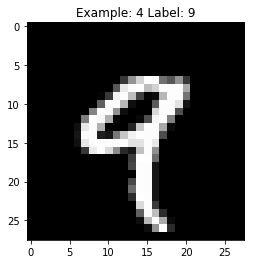

In [11]:
view_digit(4)

## Dimensionality Reduction Algorithms

The  dimensionality reduction algorithms can be divided into tw main groups: __linear projection__ and __manifold learning__ (or __nonlinear dimensionality reduction__).

Examples of the first group are __principal component analysis__ (PCA), __singular value decomposition__ (SVD), and __random projections__.

Examples of the second group include: 
- __isomap__: this technique learns the curved (or geodesic) distance between points rather than the Euclidean distance.
- __multidimensional scaling__ (MDS)
- __local linear embeddings__
- __t-distributed stochastic neighbor embedding__ (t-SNE)
- __dictionary learning__
- __random trees embedding__
- __independent component analysis__

### PCA

We first explore several versions of PCA: standard, incremental, sparse, and kernel.

The goal of PCA is to reduce the number of features (dimensions) while retaining as much variation (salient information) as possible.

This is done by finding groups of correlated features. They are combined so that a lower number of linearly uncorrelated features are created. The process involves projecting  higher dimensional data into lower dimensional space.

It is possible to reconstruct the original features from the reduced versions, although not completely.

The reduced features are called _principal components_.

The MNIST dataset has 784 features. We will try to reduce this number by applying PCA. Although some information will be lost, the remaining will still represent the original data close enough. In the same time, the lower number of features will allow us to perform clustering and anomaly detection much more effective.

#### Feature Scaling

Feature scaling is essential for the correct work of PCA algorithms that are very sensitive to the original features' ranges. In the MNIST dataset, all features are already in the same range of 0.0 to 1.0, so we can skip this step.

### Apply  PCA

We import `PCA` and set up the hyperparameters. The parameter `whiten` is explained in the PCA docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [12]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

With `n_components` set to 784 we do not reduce the dimensionality, we only transform the data. Still, 100% of the variance must be retained:

In [13]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999998


This transformation allows us to evaluate the importance of features:


In [14]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)


importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876238]
Variance Captured by First 20 Principal Components:  [0.64398025]
Variance Captured by First 50 Principal Components:  [0.8248609]
Variance Captured by First 100 Principal Components:  [0.91465857]
Variance Captured by First 200 Principal Components:  [0.96650076]
Variance Captured by First 300 Principal Components:  [0.9862489]


One can see that with the first 100 most important components we already capture 91% variance and with the first 300 - 98%.

We can visualize the importance of the first 10 components using this chart. The _y_-axis represents the proportion of the explained variance.

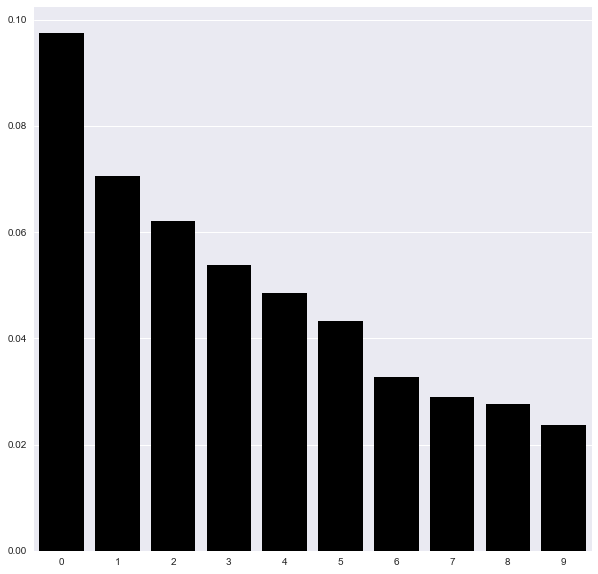

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k');

Let's try mapping our dataset using two dimensions provided by the first two most important components.

In [16]:
def scatterPlot(xDF, yDF, algoName):
    # take othe first two columns only
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    
    # join the labels
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

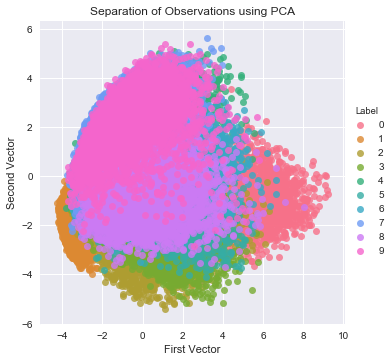

In [17]:
scatterPlot(X_train_PCA, y_train, "PCA")

We can see that the first two components do quite a good job separating the labels. This separation is learned without using the original labels. This is the power of PCA.

We can compare this graph with a similar one created out of the original, non-PCA-transformed data. We take two features representing pixels in the center of the image:

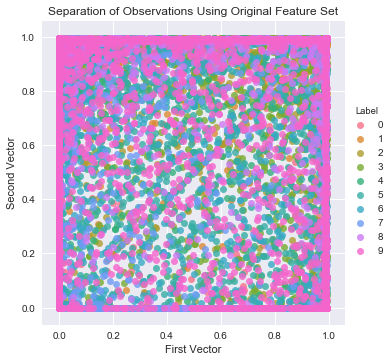

In [18]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set");

The label separation is much less obvious, almost indistinguishable from noise.

### Incremental PCA

For datasets that are too large to fit in memory, we can use PCA incrementally. We define small batches of data (manually or automatically). This batch-processed PCA is called __incremental PCA__.

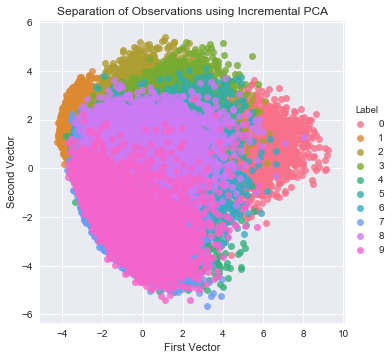

In [19]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)

X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)


X_validation_incrementalPCA = incrementalPCA.transform(X_validation)

X_validation_incrementalPCA = \
    pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

## Sparse PCA

The regular PCA looks for linear combinations of all the input variables and reduced the original space as densely as possible.

For some machine learning algorithms, some degree of sparsity may be preferred. There is a version of PCA that controls the sparsity using the parameter `alpha`: __sparse PCA__.

The sparse PCA searches for linear combinations in just some of the input variables. The original feature space is reduced not as densely as with normal PCA.

Sparse PCA runs more slowly than the regular. So we train it only on the first 10000 samples because we only need to demonstrate it.

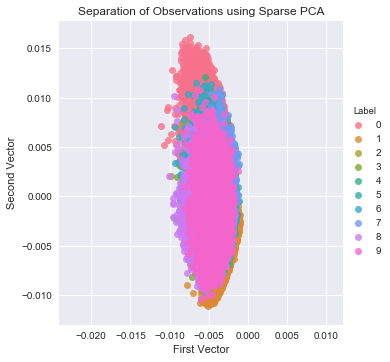

In [20]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
    pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

## Kernel PCA

Normal PCA, incremental PCA, sparse PCA linearly project  data points into a lower dimensional space. In case when data is not linearly separable, we need a non-linear projection. Kernel PCA runs a non-linear function that computes the similarity between two points. Kernel PCA maps the implicit feature space where the majority of the data points lie and creates this feature space in a much lower number of dimensions.

For a kernel PCA, we need to specify the number of components, a kernel function, the kernel coefficient (_gamma_). The most popular kernel is __radial basis function__ kernel (RBF).

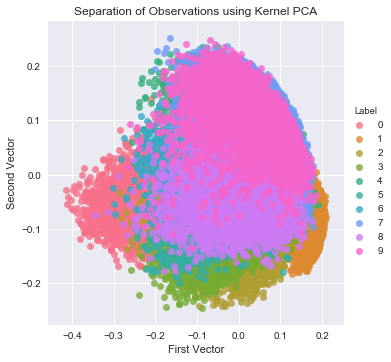

In [22]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018

n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel,\
                     gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = pd.DataFrame(data=X_validation, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

The separation we see in the scatter plot for the kernel PCA does not differ much from the one generated by the normal PCA. The use of kernel PCA, in this case, does not offer much improvement.

## Singular Value Decomposition

The idea behind the SVD is to reduce the rank of the original matrix by learning the underlying structure of the data and building a matrix of a smaller rank, This way it is possible to recreate the original matrix by using a linear combination of some of the vectors in the smaller rank matrix.

To generate a smaller rank matrix, SVD keeps the vectors in the original matrix that has the most information (highest singular value). This way, the smaller matrix will contain the most important elements of the original feature space.

Compare this to the PCA. PCA uses the eigenvalue decomposition of the covariance matrix to perform dimensionality reduction. SVD uses the singular value decomposition. Calculating PCA involves performing SVD.

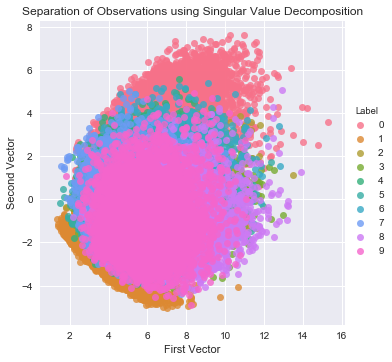

In [26]:
# Singular Value Decomposition

from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018


svd = TruncatedSVD(n_components=n_components, algorithm=algorithm,\
                  n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

## Random Projection

Dimensionality reduction can be achieved by using a technique called random projection. This is based on the _Johnson-Lindenstrauss lemma_. According to it, points in a high-dimensional space can be embedded into a much lower-dimensional space so that distances between the points are nearly preserved.

### Gaussian Random Projection

There are two versions of random projection: the __Gaussian random projection__ and the __sparse random projection__.

In Gaussian random projection, we can set the number of the target components or we can use the hyperparameter called _eps_. This parameter controls the quality of the transformation and its smaller values will generate a higher number of dimensions.


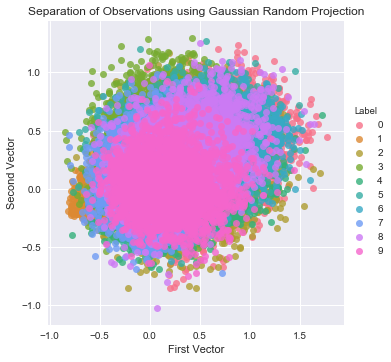

In [28]:
# Gaussian random projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps,\
                              random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

The scatter plot for the Gaussian random projection differs from those produced by PCA. This is because random projection is an entirely different type of dimensionality reduction.


### Sparse Random Projection

Just as there is a sparse version of PCA, there is a sparse version for random projection. It retains some degree of sparsity in the transformed dataset and is generally more efficient. It transforms data faster than the Gaussian random projection.

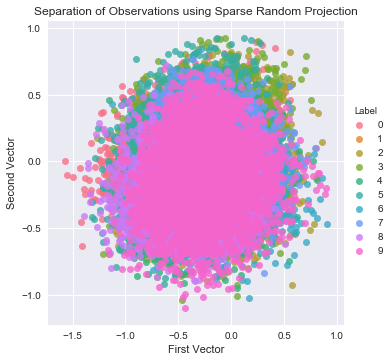

In [29]:
#Sparse Random Projection

from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, density=density,\
                            eps=eps, dense_output=dense_output,\
                            random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.fit_transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

## Isomap

Besides methods that use linear projections, there is a family on non-linear methods. These are known as __manifold learning__. 

The basic form of manifold learning is __Isomap__ (_isometric mapping_). Similar to Kernel PCA, Isomap learns a new low-dimensional embedding of the original feature set by calculating pairwise distances of all points, where the distance is __curved__ or __geodesic distance__ instead of Euclidean distance.

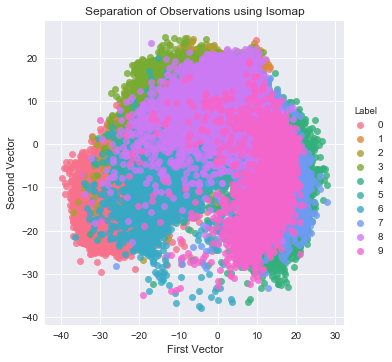

In [31]:
# Isomap

from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, \
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, \
                                   index=validation_index)

scatterPlot(X_train_isomap, y_train, "Isomap")

## Multidimensional Scaling

Multidimensional Scaling learns the similarity between points and uses this similarity to build a lower-dimensional space.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


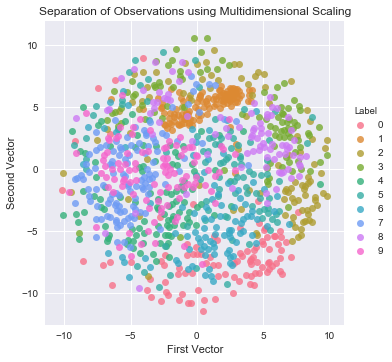

In [34]:
# Multidimensional Scaling
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

## Locally Linear Embedding

Locally Linear Embedding preserves the distances between pojnts in local neighborhoods as it projects data to a lower-dimensional space. LLE discovers non-linear structure in the original, high-dimensional data by segmenting the data into smaller components (that is, neighborhoods of points) and modeling each component as a linear embedding.

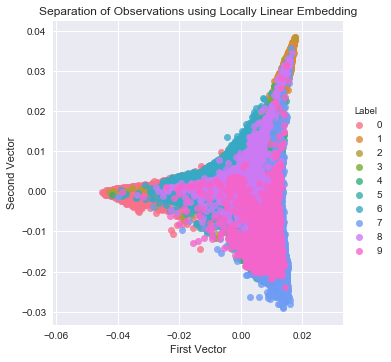

In [35]:
# Locally Linear Embeddings

from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
                             n_components=n_components, method=method,\
                            random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[:5000,:])

X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")


## t-Distributed Stochastic Neighbor Embedding

Another nonlinear dimensionality reduction method is _t-distributed Stochastic Neighbor Embedding_ (_t-SNE_). It is used for the visualization of high-dimensional data. t_SNE models each high-dimensional point in a two- or three-dimensional space. Points that are similar are modeled close to each other, while dissimilar points are modeled father away.

t-SNE constructs two probability distributions, one over pairs of points in the original space, and another over pair of points in the low-dimensional space. In effect, similar points will have a high probability, and dissimilar points will have a low probability. Specifically, t-SNE minimized the _Killback-Leibler divergence_ between two probability distributions.

In the real-world applications of t-SNE it is best to apply some form of dimensionality reduction first (e.g., PCA) to reduce the number of dimensions before applying t-SNE. This will reduce the noise in features and speed up the computation.

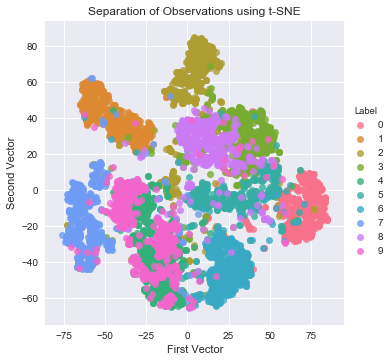

In [37]:
# t-SNE

from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate,\
           perplexity=perplexity, early_exaggeration=early_exaggeration,\
           init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

# Other Dimensionality Reduction Methods

There are methods that do not rely on any sort of distance or geometric metric.

## Dictionary Learning

__Dictionary Learning__ is a method that learns a sparse representation of the original data. The resulting matrix is called _dictionary_ and vectors that populate it are called _atoms_. These atoms are binary vectors (i.e., with values of ones and zeros). Each original feature can be reconstructed as a weighted sum of these atoms.

If we have _d_ features in the original dataset and _n_ atoms in the dictionary, we will have an _undercomplete_ dictionary when $n < d$ and an _overcomplete_ dictionary when $n>d$. With an undercomplete dictionary we achieve dimensionality reduction.

To represent images in a two-dimensional scatterplot, we will have to learn a very dense dictionary. In practice, we would use a sparser version.

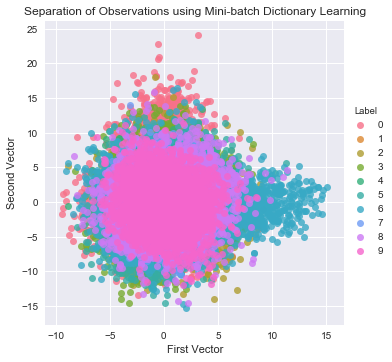

In [38]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = \
    miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = \
    pd.DataFrame(data=X_validation_miniBatchDictLearning, \
    index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

## Independent Component Analysis

One problem with unlabeled data is that many individual signals are blended in together. By applying independent component analysis, we separate these signals into their individual components. We can then reconstruct the original features by adding together some combinations of the individual components. ICA is commonly used in signal processing tasks such as identifying individual voices in a busy coffeehouse.


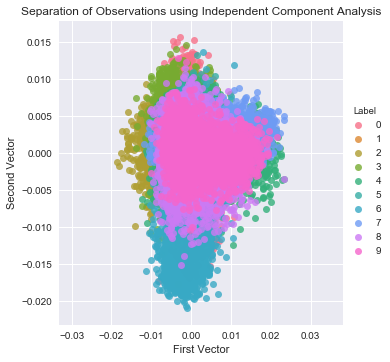

In [39]:
# Independent Component Analysis
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, \
                                    index=validation_index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

# Conclusion

In this chapter, we have looked into linear and nonlinear methods of dimensionality reduction. These methods allow us to extract the most meaningful part of data and represent the original dataset with a lower number of features (dimensions). This is achieved without using any labeled data. The result allows to meaningfully separate digits with only two dimensions.
